#  Regresión Logística (Clasificación) - Anexo Dataset

En este cuaderno analizamos el dataset a utilizar en el Entregable 1: `Breast cancer wisconsin (diagnostic) dataset`

Primero, cargamos el dataset de `sklearn`.

## Carga y análisis de los datos

In [1]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt

Según el dataset que estemos usando y su formato, podemos explorarlo y entender sus características. En este caso, `sklearn` nos proporciona un objeto tipo `Bunch`, que es como un diccionario al cual se puede acceder con notación tipo punto. Por ejemplo:

In [2]:
data = load_breast_cancer()
X = data.data
y = data.target

print(data.feature_names)  # Nombres de las características
print(data.DESCR)  # Descripción del dataset

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness 

Vemos que hay mucha información acerca del dataset y de sus variables. Sin embargo, no siempre dispondremos de dicha información y deberemos, en primer lugar, estudiar y comprender bien los datos. Para ello, podemos empezar averiguando sus dimensiones:

In [3]:
print(f"X.shape: {X.shape}")
print(f"y.shape: {y.shape}")

X.shape: (569, 30)
y.shape: (569,)


Identificamos 569 ejemplos. Cada input tiene 30 características de entrada, mientras que la salida tiene solo 1.

Es siempre muy recomendable analizar el dominio de las variables (mínimo - máximo). Una forma fácil y sistemática es usando `pandas`:

In [4]:
import pandas as pd
df_X = pd.DataFrame(data.data, columns=data.feature_names)
df_X.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Incluso podemos pintar los histogramas de cada variable:

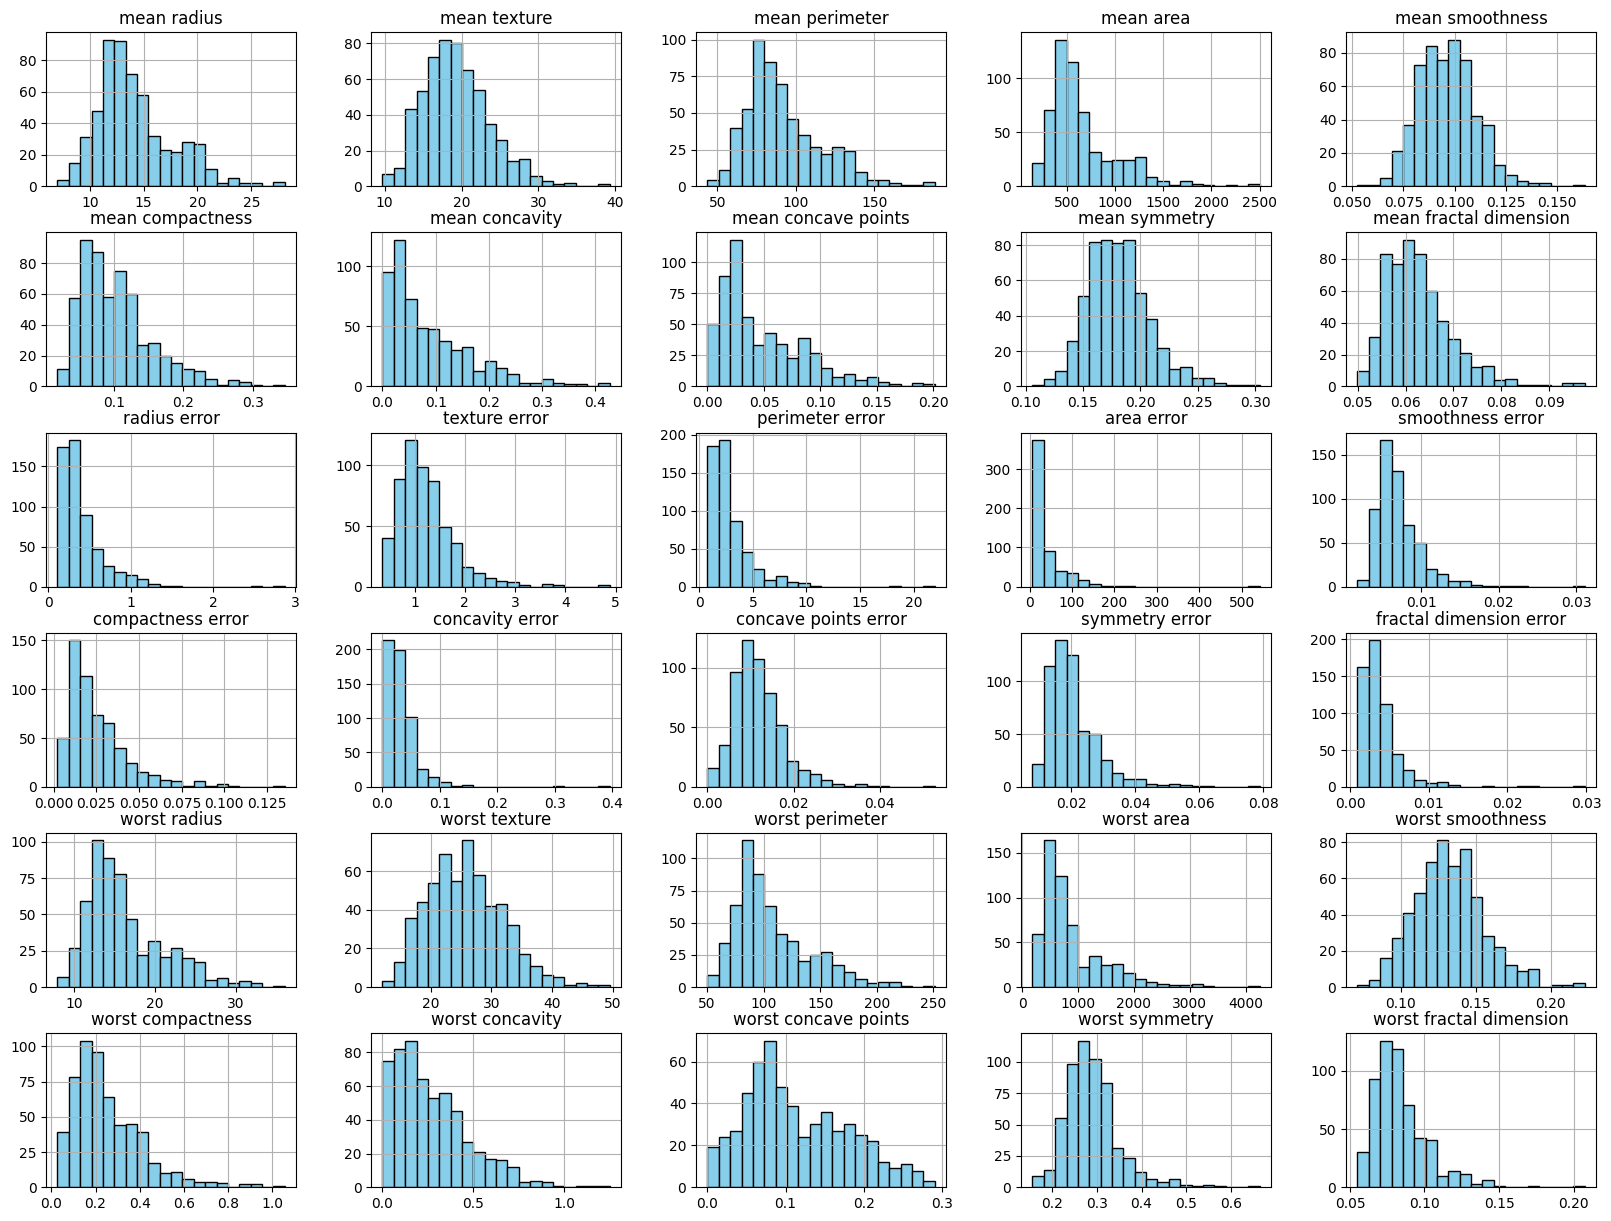

In [5]:
df_X.hist(bins=20, figsize=(20, 15), color='skyblue', edgecolor='black')
plt.show()


Podemos deducir que los ejemplos de entrada ${\bf x}$ son vectores de 30 características y, a juzgar por el mínimo y máximo de sus valores, tenemos que ${\bf x} \in \mathbb{R^+}^{30}$. En el caso de la salida, vemos que es binaria $y \in \{0, 1\}$:

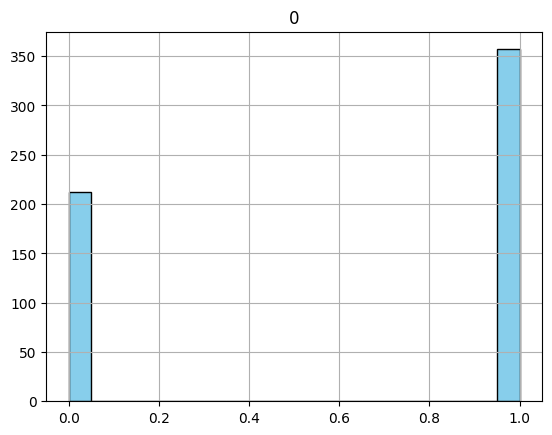

Porcentaje de 0s: 37.3% | Porcentaje de 1s: 62.7%


In [6]:
df_y = pd.DataFrame(y)
df_y.hist(bins=20, color='skyblue', edgecolor='black')
plt.show()

# Balanceo
print(f"Porcentaje de 0s: {100*(1 - np.sum(y)/len(y)):.1f}% | Porcentaje de 1s: {100*(np.sum(y)/len(y)):.1f}%")

## Creación del dataset

Como sabemos, es habitual normalizar las características para que todas las variables estén en los mismos rangos:

In [7]:
mu = np.mean(X, axis=0)
std = np.std(X, axis=0)
X = (X - mu) / std

pd.DataFrame(X).describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,...,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,-3.153111e-15,-6.568462e-15,-6.993039e-16,-8.553985e-16,6.081447e-15,-1.136369e-15,-2.997017e-16,1.023981e-15,-1.860648e-15,-1.504752e-15,...,-2.297713e-15,1.742016e-15,-1.198807e-15,6.118909e-16,-5.094929e-15,-2.122887e-15,6.118909e-16,-1.998011e-16,-2.422589e-15,2.497514e-15
std,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,...,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00
min,-2.029648e+00,-2.229249e+00,-1.984504e+00,-1.454443e+00,-3.112085e+00,-1.610136e+00,-1.114873e+00,-1.261820e+00,-2.744117e+00,-1.819865e+00,...,-1.726901e+00,-2.223994e+00,-1.693361e+00,-1.222423e+00,-2.682695e+00,-1.443878e+00,-1.305831e+00,-1.745063e+00,-2.160960e+00,-1.601839e+00
25%,-6.893853e-01,-7.259631e-01,-6.919555e-01,-6.671955e-01,-7.109628e-01,-7.470860e-01,-7.437479e-01,-7.379438e-01,-7.032397e-01,-7.226392e-01,...,-6.749213e-01,-7.486293e-01,-6.895783e-01,-6.421359e-01,-6.912304e-01,-6.810833e-01,-7.565142e-01,-7.563999e-01,-6.418637e-01,-6.919118e-01
50%,-2.150816e-01,-1.046362e-01,-2.359800e-01,-2.951869e-01,-3.489108e-02,-2.219405e-01,-3.422399e-01,-3.977212e-01,-7.162650e-02,-1.782793e-01,...,-2.690395e-01,-4.351564e-02,-2.859802e-01,-3.411812e-01,-4.684277e-02,-2.695009e-01,-2.182321e-01,-2.234689e-01,-1.274095e-01,-2.164441e-01
75%,4.693926e-01,5.841756e-01,4.996769e-01,3.635073e-01,6.361990e-01,4.938569e-01,5.260619e-01,6.469351e-01,5.307792e-01,4.709834e-01,...,5.220158e-01,6.583411e-01,5.402790e-01,3.575891e-01,5.975448e-01,5.396688e-01,5.311411e-01,7.125100e-01,4.501382e-01,4.507624e-01
max,3.971288e+00,4.651889e+00,3.976130e+00,5.250529e+00,4.770911e+00,4.568425e+00,4.243589e+00,3.927930e+00,4.484751e+00,4.910919e+00,...,4.094189e+00,3.885905e+00,4.287337e+00,5.930172e+00,3.955374e+00,5.112877e+00,4.700669e+00,2.685877e+00,6.046041e+00,6.846856e+00


Necesitamos ahora crear los conjuntos de entrenamiento, validación y test. En este ejemplo, usaremos exclusivamente entrenamiento y test, por simplicidad. El particionado lo podemos realizar con funciones de apoyo de `sklearn` como ya vimos anteriormente:

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 20% para test

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (455, 30)
X_test shape: (114, 30)
y_train shape: (455,)
y_test shape: (114,)


En resumen, el dataset que vamos a utilizar tiene las siguientes características:

1. Train set:
    * `X_train`$\in \mathbb{R^+}^{455,30}$ (sin normalizar)
    * `y_train`$\in \{0,1\}^{455}$
2. Test set:
    * `X_test`$\in \mathbb{R^+}^{114,30}$ (sin normalizar)
    * `y_test`$\in \{0,1\}^{114}$